In [1]:

import os 
import pickle 
import evaluate_predictions
import matplotlib.pyplot as plt

datapath = "../data/efficiency_test/"

### Overview

- I compare the performance of the program when using `with_coref` and when not using it with the current version of `scripts/efficiency_test.py`. 
- To reproduce, work on the branch flavio/coref [my fork](git@github.com:f-hafner/REL.git), and change the url in `scripts/efficiency_test.py`, and install REL.
- Notes
    - In `scripts/efficiency_test.py`, currently the default is run without calling `with_corefs`. I can change this in the future.

1. Compare prediction and timing of ED by calling `model.predict(mentions)` once. The results thus compare the prediction and timing between all documents.
    - Specifically, I ran
        ```bash
        python scripts/efficiency_test.py
        python scripts/efficiency_test.py --use_corefs
        ```
2. Compare timing of MD and ED by calling `model.predict(mentions)` and `mention_detection.find_mentions` 50 times. The results thus compare the timing between sets of runs through all documents. 
    - Specifically, I ran 
        ```bash
        python scripts/efficiency_test.py --n_runs 50
        python scripts/efficiency_test.py --use_corefs --n_runs 50
        ```

#### Compare ED timing and prediction across 50 documents

1. Compare predictions

In [2]:

inputs = {
    "coref": "output",
    "nocoref": "output_nocoref"
}

data = {}
for k, filename in inputs.items():
    with open(f"{datapath}{filename}.pickle", "rb") as file:
        data[k] = pickle.load(file)



In [3]:
for version, d in data.items():
    print(f"Evaluating predictions for {version}")
    evaluate_predictions.evaluate(d["predictions"])

Evaluating predictions for coref
Results: PMD RMD FMD PEL REL FEL: 97.4% 61.8% 75.7% | 65.8% 41.7% 51.1%
Evaluating predictions for nocoref
Results: PMD RMD FMD PEL REL FEL: 97.4% 61.9% 75.7% | 65.7% 41.7% 51.0%


2. Compare time 
- histogram, boxplot, difference by dataset

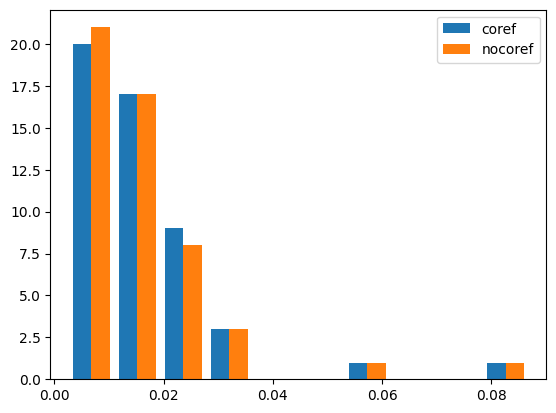

In [4]:
fig, ax = plt.subplots()

x = [v["timing"] for v in data.values()]

lbl = list(data.keys())
ax.hist(x, label=lbl)

ax.legend()


{'whiskers': [<matplotlib.lines.Line2D at 0x7fbb235243d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbb23524910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbb23524130>,
 'medians': [<matplotlib.lines.Line2D at 0x7fbb23524df0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbb234b4370>,
 'means': [<matplotlib.lines.Line2D at 0x7fbb234b40d0>,
  <matplotlib.lines.Line2D at 0x7fbb234c2550>]}

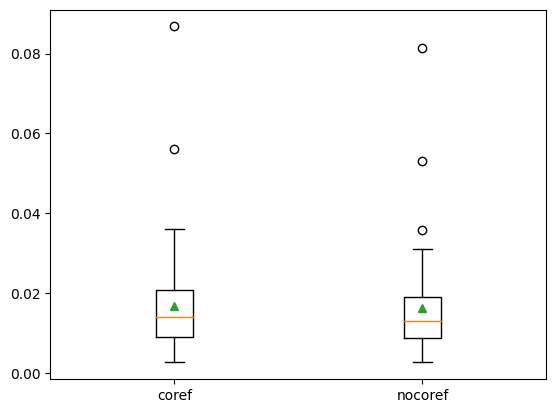

In [5]:
fig, ax = plt.subplots()

x = [v["timing"] for v in data.values()]

lbl = list(data.keys())
ax.boxplot(x, showmeans=True, labels=lbl)


Text(0.5, 0, '(coref - nocoref)/coref')

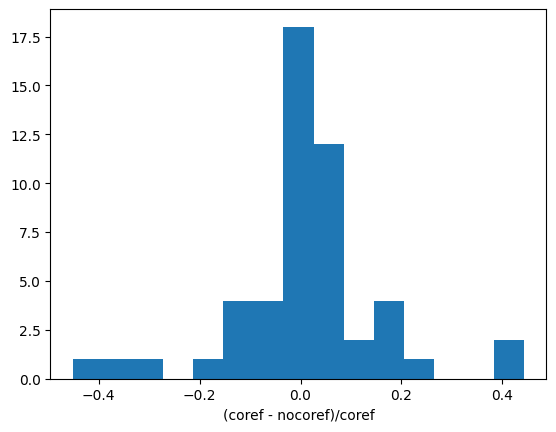

In [6]:
# timing difference by dataset

timings = {k: data[k]["timing"] for k in list(data.keys())}

coref_minus_nocoref = [(timings["coref"][i] - timings["nocoref"][i])/timings["coref"][i] for i in range(len(timings["coref"]))]


fig, ax = plt.subplots()
ax.hist(coref_minus_nocoref, bins=15)
ax.set_xlabel("(coref - nocoref)/coref")


#### Compare timing of MD and ED between runs through all documents


In [7]:
inputs = {
    "coref": "timing",
    "nocoref": "timing_nocoref"
}

data = {}
for k, filename in inputs.items():
    with open(f"{datapath}{filename}.pickle", "rb") as file:
        data[k] = pickle.load(file)



In [8]:
data.keys()

dict_keys(['coref', 'nocoref'])

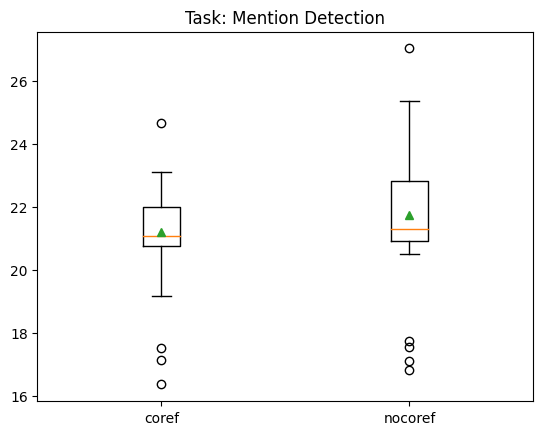

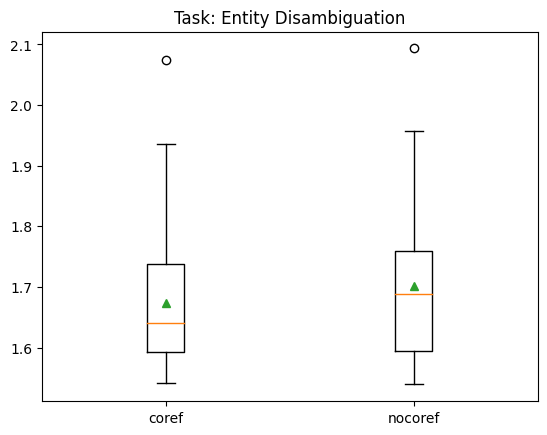

In [9]:

fig_inputs = {
    "MD": "Mention Detection",
    "ED": "Entity Disambiguation" 
}

for idx, title in fig_inputs.items():
    fig, ax = plt.subplots()

    x = [measurements[idx] for measurements in data.values()]

    lbl = list(data.keys())
    ax.boxplot(x, showmeans=True, labels=lbl)
    plt.title(f"Task: {title}")
